<a class="anchor" id="0"></a>
# **LightGBM Classifier in Python**


Hello friends,


In this kernel, I will discuss one of the most successful ML algorithm LightGBM Classifier. LightGBM is a fast, distributed, high performance gradient boosting framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks. It has helped Kagglers win data science competitions. 


So, let's get started.

**As always, I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be highly appreciated**.

# **Table of Contents** <a class="anchor" id="0.1"></a>

- [1. Introduction to LightGBM](#1)
- [2. LightGBM intuition](#2)
- [3. XGBoost Vs LightGBM](#3)
- [4. LightGBM Parameters](#4)
   - [4.1 Control Parameters](#4.1)
   - [4.2 Core Parameters](#4.2)
   - [4.3 Metric Parameter](#4.3)
   - [4.4 IO Parameter](#4.4)
- [5. LightGBM implementation in Python](#5)
- [6. LightGBM Parameter Tuning](#6)
- [7. References](#7)

# **1. Introduction to LightGBM** <a class="anchor" id="1"></a>


[Table of Contents](#0.1)


- [LightGBM](https://github.com/Microsoft/LightGBM) is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

  - Faster training speed and higher efficiency.
  - Lower memory usage.
  - Better accuracy.
  - Support of parallel and GPU learning.
  - Capable of handling large-scale data.
  
  
- At present, decision tree based machine learning algorithms dominate Kaggle competitions. The winning solutions in these competitions have adopted an alogorithm called **XGBoost**. 

- A couple of years ago, Microsoft announced its gradient boosting framework LightGBM. Nowadays, it steals the spotlight in gradient boosting machines. Kagglers start to use LightGBM more than XGBoost. LightGBM is 6 times faster than XGBoost. 

- Light GBM is a relatively new algorithm and have long list of parameters given in the [LightGBM documentation](https://github.com/microsoft/LightGBM),

- The size of dataset is increasing rapidly. It is become very difficult for traditional data science algorithms to give accurate results. Light GBM is prefixed as **Light** because of its high speed. **Light GBM can handle the large size of data and takes lower memory to run**. 

- Another reason why Light GBM is so popular is because it focuses on accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.

- It is not advisable to use LGBM on small datasets. Light GBM is sensitive to overfitting and can easily overfit small data.

# **2. LightGBM intuition** <a class="anchor" id="2"></a>


[Table of Contents](#0.1)


- LightGBM is a gradient boosting framework that uses tree based learning algorithm.


- LightGBM documentation states that -

 `LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally. 
 It means that LightGBM grows tree leaf-wise while other algorithms grow level-wise. It will choose 
 the leaf with max delta loss to grow. When growing the same leaf, leaf-wise algorithm can reduce more 
 loss than a level-wise algorithm.`
 
 
 - So, we need to understand the distinction between leaf-wise tree growth and level-wise tree growth.


## **2.1 Leaf-wise tree growth** <a class="anchor" id="2.1"></a>


[Table of Contents](#0.1)


- Leaf-wise tree growth can best be explained with the following visual -

![Leaf-wise tree growth](https://i.stack.imgur.com/YOE9y.png)

## **2.2 Level-wise tree growth** <a class="anchor" id="2.2"></a>


[Table of Contents](#0.1)


- Most decision tree learning algorithms grow tree by level (depth)-wise.

- Level-wise tree growth can best be explained with the following visual -

![Level-wise tree growth](https://i.stack.imgur.com/e1FWe.png)

## **Important points about tree-growth**


- If we grow the full tree, **best-first (leaf-wise)** and **depth-first (level-wise)** will result in the same tree. The difference is in the order in which the tree is expanded. Since we don't normally grow trees to their full depth, order matters.

- Application of early stopping criteria and pruning methods can result in very different trees. Because leaf-wise chooses splits based on their contribution to the global loss and not just the loss along a particular branch, it often (not always) will learn lower-error trees "faster" than level-wise. 

- For a small number of nodes, leaf-wise will probably out-perform level-wise. As we add more nodes, without stopping or pruning they will converge to the same performance because they will literally build the same tree eventually.

# **3. XGBoost Vs LightGBM** <a class="anchor" id="3"></a>


[Table of Contents](#0.1)



- [XGBoost](https://github.com/dmlc/xgboost) is a very fast and accurate ML algorithm. But now it's been challenged by [LightGBM](https://github.com/microsoft/LightGBM) — which runs even faster with comparable model accuracy and more hyperparameters for users to tune. 

- The key difference in speed is because **XGBoost split the tree nodes one level at a time** and **LightGBM does that one node at a time**.

- So XGBoost developers later improved their algorithms to catch up with LightGBM, allowing users to also run XGBoost in split-by-leaf mode `(grow_policy = ‘lossguide’)`. Now XGBoost is much faster with this improvement, but LightGBM is still about 1.3X — 1.5X the speed of XGB. 

- Another difference between XGBoost and LightGBM is that XGBoost has a feature that LightGBM lacks — **monotonic constraint**. It will sacrifice some model accuracy and increase training time, but may improve model interpretability.

# **4. LightGBM Parameters** <a class="anchor" id="4"></a>


[Table of Contents](#0.1)


- [LightGBM](https://github.com/microsoft/LightGBM) provides more than 100 [LightGBM parameters](https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst).

- It is very important to know some basic parameters of LightGBM. 

- So, in this section, I will discuss some basic parameters of LightGBM.


## **4.1 Control Parameters** <a class="anchor" id="4.1"></a>


[Table of Contents](#0.1)

- **max_depth** : It describes the maximum depth of tree. This parameter is used to handle model overfitting. If you feel that your model is overfitted, you should to lower max_depth.

- **min_data_in_leaf** : It is the minimum number of the records a leaf may have. The default value is 20, optimum value. It is also used to deal with overfitting.

- **feature_fraction**: Used when your boosting is random forest. 0.8 feature fraction means LightGBM will select 80% of parameters randomly in each iteration for building trees.

- **bagging_fraction** : specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.

- **early_stopping_round** : This parameter can help you speed up your analysis. Model will stop training if one metric of one validation data doesn’t improve in last early_stopping_round rounds. This will reduce excessive iterations.

- **lambda** : lambda specifies regularization. Typical value ranges from 0 to 1.

- **min_gain_to_split** : This parameter will describe the minimum gain to make a split. It can used to control number of useful splits in tree.

- **max_cat_group** : When the number of category is large, finding the split point on it is easily over-fitting. So LightGBM merges them into ‘max_cat_group’ groups, and finds the split points on the group boundaries, default:64.

## **4.2 Core Parameters** <a class="anchor" id="4.2"></a>


[Table of Contents](#0.1)

- **Task** : It specifies the task you want to perform on data. It may be either train or predict.

- **application** : This is the most important parameter and specifies the application of your model, whether it is a regression problem or classification problem. LightGBM will by default consider model as a regression model.

  - **regression** : for regression
  - **binary** : for binary classification
  - **multiclass** : for multiclass classification problem
  
  
- **boosting** : defines the type of algorithm you want to run, default=gdbt.

  - **gbdt** : traditional Gradient Boosting Decision Tree
  - **rf** : random forest
  - **dart** : Dropouts meet Multiple Additive Regression Trees
  - **goss** : Gradient-based One-Side Sampling
  
  
- **num_boost_round** : Number of boosting iterations, typically 100+

- **learning_rate** : This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates. Typical values: 0.1, 0.001, 0.003…

- **num_leaves** : number of leaves in full tree, default: 31

- **device** : default: cpu, can also pass gpu

## **4.3 Metric Parameter** <a class="anchor" id="4.3"></a>


[Table of Contents](#0.1)


- metric: again one of the important parameter as it specifies loss for model building. Below are few general losses for regression and classification.

  - **mae** : mean absolute error
  - **mse** : mean squared error
  - **binary_logloss** : loss for binary classification
  - **multi_logloss** : loss for multi classification

## **4.4 IO Parameter** <a class="anchor" id="4.4"></a>


[Table of Contents](#0.1)

- **max_bin** : it denotes the maximum number of bin that feature value will bucket in.

- **categorical_feature** : It denotes the index of categorical features. If categorical_features=0,1,2 then column 0, column 1 and column 2 are categorical variables.

- **ignore_column** : same as categorical_features just instead of considering specific columns as categorical, it will completely ignore them.

- **save_binary** : If you are really dealing with the memory size of your data file then specify this parameter as ‘True’. Specifying parameter true will save the dataset to binary file, this binary file will speed your data reading time for the next time.

Now, we move on to the LightGBM implementation.

# **5. LightGBM implementation in Python** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)

## **Initial Set-Up**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


## **Read dataset**

In [4]:
# load and preview data
df = pd.read_csv('/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## **View summary of dataset**

In [5]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
def plot_target_dist_vs_continuos_var(continuos_variable: str) -> None:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    x = range(len(df))
    y = df[continuos_variable]
    categorias = df['diagnosis']
    axs[0].scatter(x, y, c=categorias)
    x = categorias
    y = df[continuos_variable]
    sns.barplot(x=x, y=y, ax=axs[1])
    title = 'Shape of target variable for cont var: ' + continuos_variable  
    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top=0.925)
    plt.show()
    
# plot_target_dist_vs_continuos_var('mean_texture')

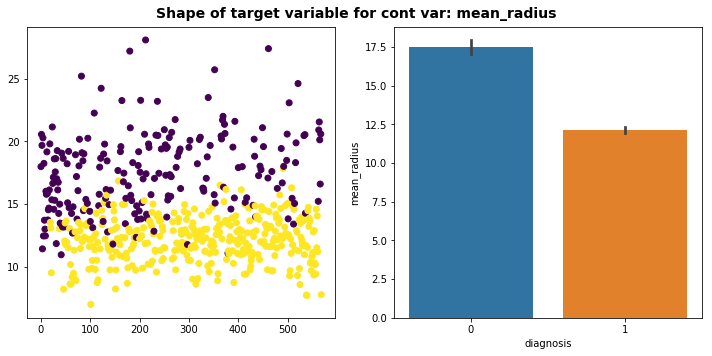

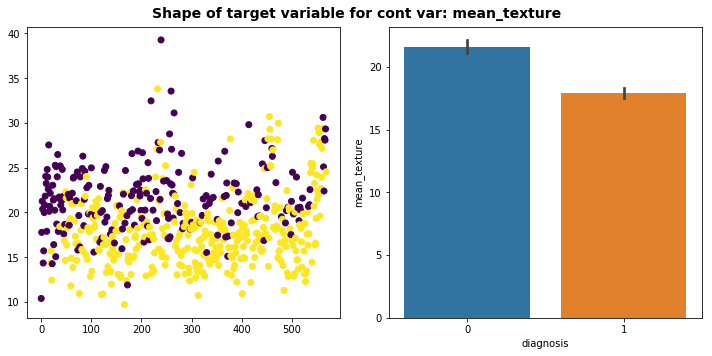

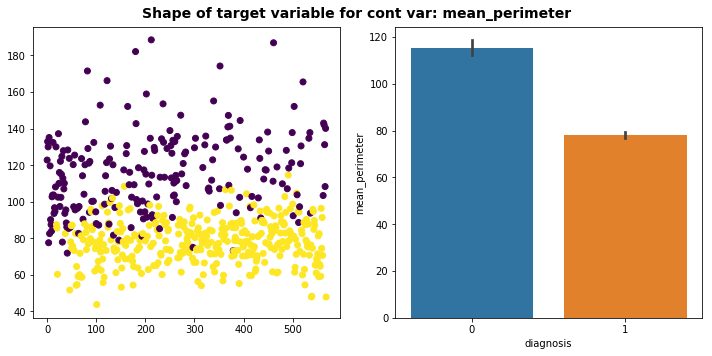

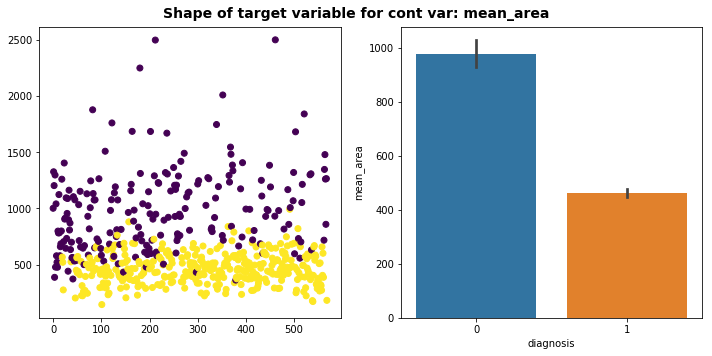

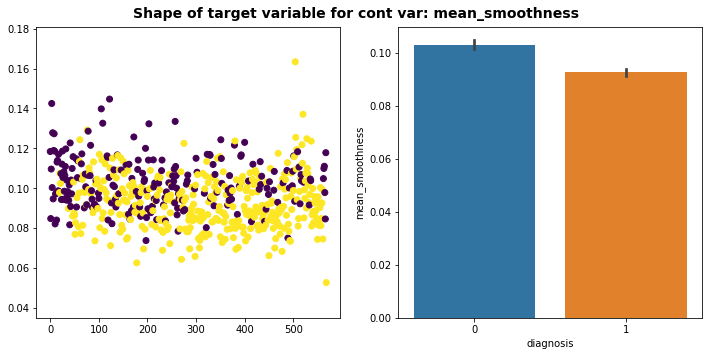

In [8]:
for col in df.columns[:-1]:
    plot_target_dist_vs_continuos_var(col)
    print(" ")

- We can see that there are 6 columns in the dataset and there are no missing values.

## **Check the distribution of target variable**

-  target variable is `diagnosis`
-  check the distribution of the target variable.

In [9]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

- The target variable is `diagnosis`. It contains 2 values - 0 and 1. 

- `0` is for **Negative prediction** and `1` for **Positive prediction**.

- We  can see that the problem is binary classification task.

## **Declare feature vector and target variable**

## **Split dataset into training and test set**

In [10]:
columns = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']

X = df[columns]
y = df['diagnosis']

In [11]:
df[columns].corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


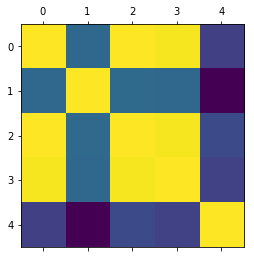

In [13]:
import matplotlib.pyplot as plt

plt.matshow(df[columns].corr())
plt.show()

In [14]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## **LightGBM Model Development and Training**


- We need to convert our training data into LightGBM dataset format(this is mandatory for LightGBM training).

- After creating the necessary dataset, we created a python dictionary with parameters and their values. 

- Accuracy of the model depends on the values we provide to the parameters.

- In the end block of code, we simply trained model with 100 iterations.

In [15]:
# build the lightgbm model
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred_lgbm = lgb.predict(X_test)


from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
# predict the results
y_pred_tree = tree.predict(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


# view accuracy
from sklearn.metrics import accuracy_score
accuracy_tree=accuracy_score(y_pred_tree, y_test)
accuracy_lgbm=accuracy_score(y_pred_lgbm, y_test)
accuracy_gnb=accuracy_score(y_pred_gnb, y_test)

accuracy_lgbm, accuracy_tree, accuracy_gnb

(0.9239766081871345, 0.9239766081871345, 0.9298245614035088)

## **Model Prediction**

## **View Accuracy**

- Here, `y_test` are the true class labels and `y_pred` are the predicted class labels in the test-set.

## **Compare train and test set accuracy**

- Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [16]:
for model, acc in zip([lgb, tree, gnb], [accuracy_lgbm, accuracy_tree, accuracy_gnb]):
    y_pred_train = model.predict(X_train)
    print(f" For model {model} acc in test: {acc} and train:")
    print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
    print(" ")

 For model LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) acc in test: 0.9239766081871345 and train:
Training-set accuracy score: 1.0000
 
 For model DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') acc in test: 0.9239766081871345 and

- The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

## **Confusion-matrix**

In [24]:
type(model).__name__

'GaussianNB'

 Matrix conf for model LGBMClassifier


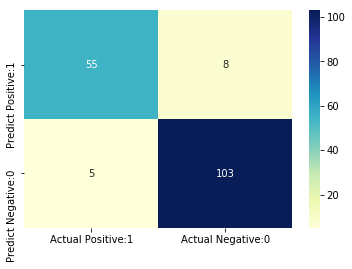

 
 Matrix conf for model DecisionTreeClassifier


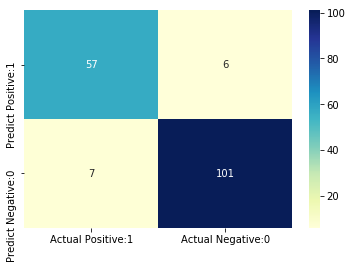

 
 Matrix conf for model GaussianNB


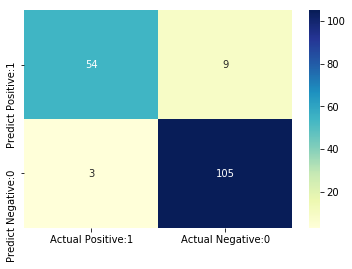

In [25]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

def plot_conf_matrix(model) -> None:
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
#     print('Confusion matrix\n\n', cm)
#     print('\nTrue Positives(TP) = ', cm[0,0])
#     print('\nTrue Negatives(TN) = ', cm[1,1])
#     print('\nFalse Positives(FP) = ', cm[0,1])
#     print('\nFalse Negatives(FN) = ', cm[1,0])
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                     index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()
    
for model in [lgb, tree, gnb]:
    name = type(model).__name__
    print(f" Matrix conf for model {name}")
    plot_conf_matrix(model)
    print(" ")

# **Classification Metrices** 

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        63
           1       0.93      0.95      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



# **6. LightGBM Parameter Tuning**  <a class="anchor" id="6"></a>


[Table of Contents](#0.1)

- In this section, I will discuss some tips to improve LightGBM model efficiency.

- Following set of practices can be used to improve your model efficiency.

  - 1 **num_leaves** : This is the main parameter to control the complexity of the tree model. Ideally, the value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result in overfitting.

  - 2 **min_data_in_leaf** : Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

  - 3 **max_depth** : We also can use max_depth to limit the tree depth explicitly.

## **For Faster Speed**

- Use bagging by setting `bagging_fraction` and `bagging_freq`.
- Use feature sub-sampling by setting `feature_fraction`.
- Use small `max_bin`.
- Use `save_binary` to speed up data loading in future learning.

## **For better accuracy**

- Use large `max_bin` (may be slower).
- Use small `learning_rate` with `large num_iterations`
- Use large `num_leaves`(may cause over-fitting)
- Use bigger training data
- Try `dart`
- Try to use categorical feature directly.

## **To deal with over-fitting**

- Use small `max_bin`
- Use small `num_leaves`
- Use `min_data_in_leaf` and `min_sum_hessian_in_leaf`
- Use bagging by set `bagging_fraction` and `bagging_freq`
- Use feature sub-sampling by set `feature_fraction`
- Use bigger training data
- Try `lambda_l1`, `lambda_l2` and `min_gain_to_split` to regularization
- Try `max_depth` to avoid growing deep tree

# **7. References**  <a class="anchor" id="7"></a>


[Table of Contents](#0.1)


- The ideas and concepts in this kernel are taken from the following websites -

- https://github.com/Microsoft/LightGBM

- https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst

- https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

- https://sefiks.com/2018/10/13/a-gentle-introduction-to-lightgbm-for-applied-machine-learning/

- https://towardsdatascience.com/build-xgboost-lightgbm-models-on-large-datasets-what-are-the-possible-solutions-bf882da2c27d



That is the end of this kernel.

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

Thank you


[Go to Top](#0)